In [1]:
%pylab inline
%autosave 20
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['KERAS_BACKEND']='theano'
import keras
import sys
sys.path.append('/home/peter')
sys.path.append('/home/peter/code/projects/MultiNEAT')
sys.path.append('/home/ubuntu')
from universal import *
sys.path.append('/home/peter/code/projects')
sys.path.append('/home/peter/code/work/automl')
sys.path.append('/home/peter/code/projects/deepneat')
sys.path.append('/home/ubuntu')
sys.path.append('/home/ubuntu/new/automl')
from aidevutil import *
from keras.utils.vis_utils import plot_model
from tqdm import tqdm_notebook as tqdm
from deepneat import *
from sklearn.model_selection import StratifiedKFold
from project_common import *
import project_common

Populating the interactive namespace from numpy and matplotlib


Autosaving every 20 seconds


Using Theano backend.
Using cuDNN version 7103 on context None
Mapped name None to device cuda: GeForce GTX 1080 (0000:01:00.0)


vizdoom could not be imported


[MLENS] backend: threading


In [2]:
rnd.seed()

In [3]:
from dask import compute, delayed, persist
from dask.distributed import Client, wait
from dask.distributed import as_completed

In [4]:
import ipywidgets as widgets

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.svm import SVC

In [7]:
import multiprocessing as mpc

### Load data

In [8]:
def revsigm(data):
    return 1.-(1./(1.+np.exp(-data)))

def Outputs(data):
    return np.round(revsigm(data))
    
def MungeData(data):
    # Sex
    data.drop(['Ticket', 'Name'], inplace=True, axis=1)
    data.Sex.fillna('0', inplace=True)
    data.loc[data.Sex != 'male', 'Sex'] = 0
    data.loc[data.Sex == 'male', 'Sex'] = 1
    # Cabin
    cabin_const = 1
    data.Cabin.fillna(str(cabin_const), inplace=True)
    data.loc[data.Cabin.str[0] == 'A', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'B', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'C', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'D', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'E', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'F', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'G', 'Cabin'] = cabin_const
    data.loc[data.Cabin.str[0] == 'T', 'Cabin'] = cabin_const
    # Embarked
    data.loc[data.Embarked == 'C', 'Embarked'] = 1
    data.loc[data.Embarked == 'Q', 'Embarked'] = 2
    data.loc[data.Embarked == 'S', 'Embarked'] = 3
    data.Embarked.fillna(0, inplace=True)
    data.fillna(-1, inplace=True)
    return data.astype(float)

if socket.gethostname() in ['desktop','laptop']:
    train = pd.read_csv("../../work/automl/titanic/train.csv", dtype={"Age": np.float64}, )
    test = pd.read_csv("../../work/automl/titanic/test.csv", dtype={"Age": np.float64}, )
else:
    train = pd.read_csv("/home/ubuntu/new/automl/titanic/train.csv", dtype={"Age": np.float64}, )
    test = pd.read_csv("/home/ubuntu/new/automl/titanic/test.csv", dtype={"Age": np.float64}, )
    
mdt = MungeData(train)

dy = mdt['Survived'].values
dx = mdt.drop(['Survived'], axis=1).values[:,1:]
dx_test_df = MungeData(test)
dx_test = dx_test_df.values[:,1:]

In [9]:
dx.shape, dy.shape

((891, 8), (891,))

In [10]:
dx.shape, dy.shape

((891, 8), (891,))

In [11]:
# make submission
mytest = dx_test_df.values

p = pkl.load(open('predictions.pkl','rb'))
len(p)

p = (np.mean(p, axis=0))

5

In [12]:
p, sum(p), len(p), sum(p)/len(p)

(array([0. , 0. , 0. , 0. , 0.4, 0. , 0.4, 0. , 1. , 0. , 0. , 0. , 1. ,
        0. , 1. , 1. , 0. , 0. , 0.4, 0.2, 0.4, 0. , 1. , 0.8, 1. , 0. ,
        1. , 0. , 0.6, 0. , 0. , 0. , 0.6, 0.2, 0.8, 0. , 0.2, 0.2, 0. ,
        0.2, 0. , 0.2, 0. , 1. , 1. , 0. , 0. , 0. , 1. , 1. , 0.2, 0. ,
        1. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 1. , 0.8,
        1. , 1. , 0. , 0.2, 1. , 1. , 0. , 0.6, 0.2, 1. , 0.8, 0. , 1. ,
        0. , 1. , 0.8, 0.2, 0. , 0. , 0. , 0. , 1. , 0.8, 1. , 0.8, 0.2,
        0. , 1. , 0. , 0.2, 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 0. ,
        1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 0. ,
        1. , 0.8, 1. , 1. , 0. , 1. , 0. , 0. , 1. , 0. , 0.8, 0. , 0. ,
        0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0.2, 0. , 0. , 1. , 0.2,
        0. , 0.6, 0. , 0. , 0. , 0.2, 0. , 1. , 0. , 0. , 0.8, 0. , 0. ,
        1. , 0.6, 0.6, 0.6, 1. , 0.8, 1. , 0. , 0. , 0. , 0. , 0. , 1. ,
        0.2, 0. , 0.4, 0. , 0. , 0. , 1. , 1. , 0.4

In [13]:
#p[p<5] = 0
#p[p>11] = 0
#p[p>0] = 1
#p, sum(p), len(p), sum(p)/len(p)

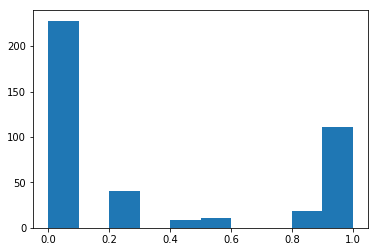

In [14]:
hist(p);

In [15]:
p1 = pkl.load(open('predictions.pkl','rb'))
len(p1)

p1 = np.round(np.sum(p1, axis=0))
p1, sum(p1), len(p1), sum(p1)/len(p1)

5

(array([0., 0., 0., 0., 2., 0., 2., 0., 5., 0., 0., 0., 5., 0., 5., 5., 0.,
        0., 2., 1., 2., 0., 5., 4., 5., 0., 5., 0., 3., 0., 0., 0., 3., 1.,
        4., 0., 1., 1., 0., 1., 0., 1., 0., 5., 5., 0., 0., 0., 5., 5., 1.,
        0., 5., 5., 0., 0., 0., 0., 0., 5., 0., 0., 0., 5., 4., 5., 5., 0.,
        1., 5., 5., 0., 3., 1., 5., 4., 0., 5., 0., 5., 4., 1., 0., 0., 0.,
        0., 5., 4., 5., 4., 1., 0., 5., 0., 1., 0., 5., 0., 5., 0., 5., 0.,
        0., 0., 5., 0., 0., 0., 0., 0., 0., 5., 5., 5., 5., 0., 0., 5., 4.,
        5., 5., 0., 5., 0., 0., 5., 0., 4., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 0., 0., 5., 1., 0., 3., 0., 0., 0., 1., 0., 5., 0., 0.,
        4., 0., 0., 5., 3., 3., 3., 5., 4., 5., 0., 0., 0., 0., 0., 5., 1.,
        0., 2., 0., 0., 0., 5., 5., 2., 5., 5., 0., 2., 5., 0., 5., 0., 5.,
        0., 0., 0., 0., 0., 1., 0., 4., 0., 5., 5., 0., 1., 5., 4., 1., 5.,
        0., 1., 1., 0., 5., 0., 0., 0., 0., 5., 0., 0., 5., 0., 5., 0., 5.,
        0., 

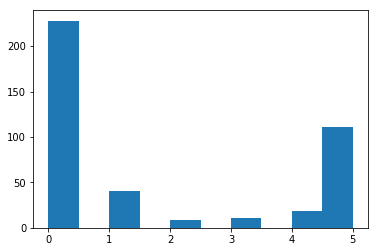

In [16]:
hist(p1);

In [17]:
testPredictions = array(p).reshape(-1)
pdtest = pd.DataFrame({'PassengerId': dx_test_df.PassengerId.astype(int),
                        'Survived': testPredictions.astype(int)})
pdtest.to_csv('titanic_skneat_ensemble_1.csv', index=False)# make submission